In [1]:
%run "../../../common/0_notebooks_base_setup.py"    

C:\Users\mbeati\Documents\2021\dsad_2021\common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Estadística Inferencial

## Imports

In [2]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

Utilizamos una muestra aleatoria de puntajes de influencia de redes sociales del servicio klout. 

Klout era un sitio web y una aplicación móvil que utilizaba análisis de redes sociales para calificar usuarios de acuerdo con su influencia social en línea. 

El sitio calculaba un "Klout Score", que era un valor numérico entre 1 y 100 donde puntuaciones más altas correspondian a una mayor "influencia social" en línea.

De una población de más de 620 millones de puntajes obtuvimos una muestra de tamaño 1048

Pueden ver más detalles sobre klout <a href="https://topinfluencers.es/que-es-klout/" target="_blank">aquí</a>

## Leemos los datos

In [3]:
data_klout = pd.read_csv('../Data/klout-scores.csv', header=None, names=['scores'])
data_klout.head()

,scores
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690


## Ejercicio 1: Intervalos de confianza

Escribir una función que dado los datos como una instancia de Series, un número n_sample, y un valor alpha tome una muestra de los datos de tamaño n y calcule la media muestral y el intervalo de confianza para la media a partir de esa muestra.

$$\bar{x}-z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}\lt\mu_{estimator}\lt\bar{x}+z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}$$ 

Usemos esa función para calcular los intervalos de confianza de nivel 95% para las medias de los scores de data_klout en una muestra de tamaño 20 y otra de tamaño 100.


In [4]:
def confidence_interval(data, n_sample, alpha):    

    # muestreo:
    random_generator = np.random.default_rng()
    index_sample = random_generator.choice(data.index, size = n_sample,  replace=False)
    data_sample = data.loc[index_sample]
        
    data_sample_xbar = data_sample.mean()
    
    data_sample_sd = data_sample.std()

    data_sample_se = data_sample_sd / math.sqrt(n_sample)

    critical_value = stats.norm.ppf(alpha / 2) * (-1)

    sample_CI_mean_lower = data_sample_xbar - critical_value * data_sample_se
    sample_CI_mean_upper = data_sample_xbar + critical_value * data_sample_se
        
    return (data_sample_xbar, sample_CI_mean_lower, sample_CI_mean_upper)


In [5]:
mean_ci_20 = confidence_interval(data_klout.scores, n_sample = 20, alpha = 0.05)
mean_ci_20

(30.312282701500003, 22.832708085497615, 37.79185731750239)

In [6]:
mean_ci_100 = confidence_interval(data_klout.scores, n_sample = 100, alpha = 0.05)
mean_ci_100

(39.2976094709, 35.9935646710193, 42.6016542707807)

In [7]:
print(len(data_klout.scores))
data_klout.scores.mean()

1048


37.71905483253817

In [8]:
mean_ci_20_90 = confidence_interval(data_klout.scores, n_sample = 20, alpha = 0.1)
mean_ci_20_90

(31.644595480500005, 26.505576932565475, 36.783614028434535)

In [9]:
mean_ci_100_90 = confidence_interval(data_klout.scores, n_sample = 100, alpha = 0.1)
mean_ci_100_90

(36.6016285517, 33.7470514344568, 39.456205668943205)

## Ejercicio 2: Normal vs. T de Student

**2.1** Grafiquemos los datos de klout-scores para tenes alguna intuición sobre su distribución.

**2.2** En el ejercicio anterior calculamos los intervalos de confianza de nivel 95% para las medias de los scores de data_klout en una muestra de tamaño 20 y otra de tamaño 100 usando el desvío estándar de la muestra como aproximación a sigma, y distribución normal. 

Repitamos ahora este cálculo para valores de n entre 5 y 200 con paso 5 (o sea 5, 10, 15, .... 200)

Y calculemos para esos mismos valores de n las longitudes de los intervalos de confianza considerando que **no conocemos el desvío estándar poblacional**

**2.3** Construyamos un dataset cuyas columnas sean 

* tamaño del intervalo de confianza de los resultado del ejercicio 1 o 2

* n, 5 a 200 con paso 5 

* fuente, si el resultado proviene del ejercicio 1 (desvío estándar poblacional conocido) o del ejercicio 2 (desvío estándar poblacional desconocido)

**2.4** A partir de este dataset grafiquemos las dos series de resultados en función de n. 

**2.5** ¿A partir de qué valor de n el cálculo del ejercicio 1 es equivalente al del ejercicio 2? Para responder esta pregunta grafiquemos para cada valor de n el valor absoluto de la diferencia entre los resultados de los ejercicios 1 y 2.



---

**2.1**. Graficamos los datos de klout-scores

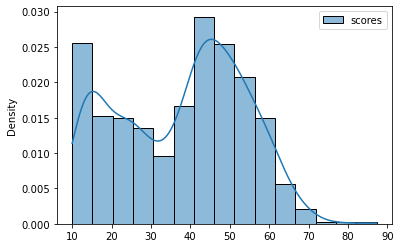

In [10]:
p = sns.histplot(data_klout, kde = True, stat = 'density');

No conocemos el desvío estándar poblacional y la distribución no es simétrica

---

**2.2**

In [11]:
def confidence_interval_t(data, n_sample, alpha):    

    # muestreo:
    random_generator = np.random.default_rng()
    index_sample = random_generator.choice(data.index, size = n_sample,  replace=False)
    data_sample = data.loc[index_sample]
        
    data_sample_xbar = data_sample.mean()
    
    data_sample_sd = data_sample.std()

    data_sample_se = data_sample_sd / math.sqrt(n_sample)

    nu = n_sample - 1
    critical_value = stats.t.ppf(alpha / 2, df = nu) * (-1)

    sample_CI_mean_lower = data_sample_xbar - critical_value * data_sample_se
    sample_CI_mean_upper = data_sample_xbar + critical_value * data_sample_se
        
    return (data_sample_xbar, sample_CI_mean_lower, sample_CI_mean_upper)


In [12]:
alpha = 0.05

n = range(5, 205, 5)

resultados_ejercicio_1 = []
for n_sample in n:
    xbar, mean_lower, mean_upper = confidence_interval(data_klout, n_sample, alpha)
    ci_length = mean_upper - mean_lower    
    resultados_ejercicio_1.extend(ci_length.values)
    
resultados_ejercicio_2 = []
for n_sample in n:    
    xbar, mean_lower, mean_upper = confidence_interval_t(data_klout, n_sample, alpha)
    ci_length = mean_upper - mean_lower
    #print(ci_length)
    resultados_ejercicio_2.extend(ci_length.values)

#print(resultados_ejercicio_1)    
#print(resultados_ejercicio_2)    


**2.3**

In [13]:
data_ej1_dict = {"ci_tam": resultados_ejercicio_1,             
            "n": n,
            "fuente": "sd conocido"}

data_ej2_dict = {"ci_tam": resultados_ejercicio_2,             
            "n": n,
            "fuente": "sd desconocido"}

data_ej1 = pd.DataFrame.from_dict(data_ej1_dict)
data_ej1

data_ej2 = pd.DataFrame.from_dict(data_ej2_dict)
data_ej2

data = pd.concat([data_ej1, data_ej2])
data


,ci_tam,n,fuente
0,23.676932,5,sd conocido
1,24.121777,10,sd conocido
2,18.033511,15,sd conocido
3,14.934182,20,sd conocido
4,15.122022,25,sd conocido
...,...,...,...
35,4.845887,180,sd desconocido
36,4.968777,185,sd desconocido
37,4.603010,190,sd desconocido
38,4.448558,195,sd desconocido


**2.4**



<AxesSubplot:xlabel='n', ylabel='ci_tam'>

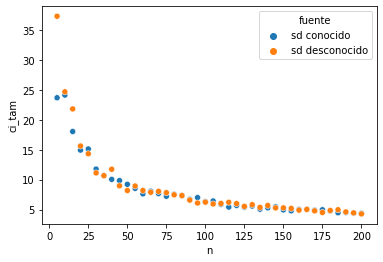

In [14]:
sns.scatterplot(data=data, x="n", y="ci_tam", hue="fuente")

Vemos que para valores de n chicos, la longitud de los intervalos son mayores cuando el sd de la población es desconocido.

A medida que aumenta n esta diferencia disminuye

**2.5**

<AxesSubplot:xlabel='n', ylabel='distancia'>

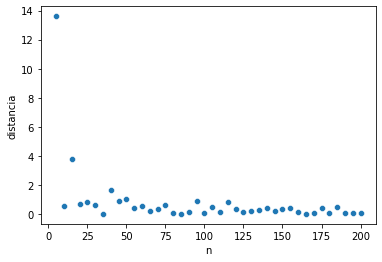

In [18]:
data_dif = pd.merge(data_ej1, data_ej2, how = "inner", on = "n", suffixes = ('_ej1', '_ej2'))
#data_dif
data_dif['distancia'] = abs(data_dif.ci_tam_ej2 - data_dif.ci_tam_ej1)
#data_dif
sns.scatterplot(data=data_dif, x="n", y="distancia")

Para valores a partir de 150 vemos que se estabiliza la distancia entre las longitudes de los intervalos de confianza calculados de una y otra forma.

Un valor tan grande de n para obtener resultados similares es consecuencia de que la distribución de datos original no es simétrica. Con distribuciones más simétricas, estos resultados convergerán para valores de n más pequeños.